In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
0,0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147,False,"['``', 'i', 'have', 'used', 'restasis', 'for',...","['used', 'restasis', 'year', 'seen', 'almost',...","['i', 'have', 'used', 'restasis', 'for', 'abou...","['used', 'restasis', 'year', 'seen', 'almost',...","[('used', 'VBN'), ('restasis', 'NN'), ('year',...","['use', 'restasis', 'year', 'see', 'almost', '..."
1,1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136,False,"['``', 'my', 'experience', 'has', 'been', 'som...","['experience', 'somewhat', 'mixed', 'using', '...","['my', 'experience', 'has', 'been', 'somewhat'...","['experience', 'somewhat', 'mixed', 'using', '...","[('experience', 'NN'), ('somewhat', 'RB'), ('m...","['experience', 'somewhat', 'mixed', 'use', 'im..."
2,2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140,False,"['``', 'this', 'is', 'my', 'second', 'implanon...","['second', 'implanon', 'would', 'recommend', '...","['this', 'is', 'my', 'second', 'implanon', 'wo...","['second', 'implanon', 'would', 'recommend', '...","[('second', 'JJ'), ('implanon', 'NN'), ('would...","['second', 'implanon', 'would', 'recommend', '..."
3,3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104,False,"['``', 'i', 'recommend', 'taking', 'as', 'pres...","['recommend', 'taking', 'prescribed', 'bottle'...","['i', 'recommend', 'taking', 'as', 'prescribed...","['recommend', 'taking', 'prescribed', 'bottle'...","[('recommend', 'NN'), ('taking', 'VBG'), ('pre...","['recommend', 'take', 'prescribed', 'bottle', ..."
4,4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74,False,"['``', 'i', 'have', 'been', 'on', 'ampyra', 'f...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","['i', 'have', 'been', 'on', 'ampyra', 'for', '...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","[('ampyra', 'RB'), ('5', 'CD'), ('days', 'NNS'...","['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109677,806,140111,Asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,"September 14, 2016",18,141,False,"['``', 'i', 'had', 'tried', 'many', 'medicatio...","['tried', 'many', 'medications', 'level', 'bip...","['i', 'had', 'tried', 'many', 'medications', '...","['tried', 'many', 'medications', 'level', 'bip...","[('tried', 'VBD'), ('many', 'JJ'), ('medicatio...","['try', 'many', 'medication', 'level', 'bipola..."
109678,807,103534,Synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,"October 27, 2014",61,124,False,"['``', 'had', 'partial', 'thyroid', 'removal',...","['partial', 'thyroid', 'removal', 'benign', 't...","['had', 'partial', 'thyroid', 'removal', 'with...","['partial', 'thyroid', 'removal', 'benign', 't...","[('partial', 'JJ'), ('thyroid', 'NN'), ('remov...","['partial', 'thyroid', 'removal', 'benign', 't..."
109679,808,161014,Risperidone,depression,"""my experience with risperdal started when i f...",8.0,"September 2, 2015",21,130,False,"['``', 'my', 'experience', 'with', 'risperdal'...","['experience', 'risperdal', 'started', 'first'...","['my', 'experience', 'with', 'risperdal', 'sta...","['experience', 'risperdal', 'started', 'first'...","[('experience', 'NN'), ('risperdal', 'NN'), ('...","['experience', 'risperdal', 'start', 'first', ..."
109680,809,132424,Ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,"March 30, 2009",47,77,False,"['``', 'my', 'elderly', 'dad', 'was', 'prescri...","['elderly', 'dad', 'prescribed', 'low

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
filtered_conditions = df[df['condition'].str.contains('</span>', na=False)]
filtered_conditions

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
150,168131,Jolessa,4</span> users found this comment helpful.,"""i am almost on my third month of my first pac...",5.0,"April 25, 2011",4,80,False,"['``', 'i', 'am', 'almost', 'on', 'my', 'third...","['almost', 'third', 'month', 'first', 'pack', ...","['i', 'am', 'almost', 'on', 'my', 'third', 'mo...","['almost', 'third', 'month', 'first', 'pack', ...","[('almost', 'RB'), ('third', 'JJ'), ('month', ...","['almost', 'third', 'month', 'first', 'pack', ..."
260,124318,Skyla,3</span> users found this comment helpful.,"""never pregnant,28,retroverted small (6cm) ute...",1.0,"December 16, 2015",3,103,False,"['``', 'never', 'pregnant,28', ',', 'retrovert...","['never', 'pregnant 28', 'retroverted', 'small...","['never', 'pregnant 28', 'retroverted', 'small...","['never', 'pregnant 28', 'retroverted', 'small...","[('never', 'RB'), ('pregnant 28', 'NN'), ('ret...","['never', 'pregnant 28', 'retrovert', 'small',..."
1158,33552,Microgestin Fe 1 / 20,7</span> users found this comment helpful.,"""i was on junel fe 1/20 and randomly got switc...",3.0,"March 12, 2013",7,128,False,"['``', 'i', 'was', 'on', 'junel', 'fe', '1/20'...","['junel', 'fe', '1 20', 'randomly', 'got', 'sw...","['i', 'was', 'on', 'junel', 'fe', '1 20', 'and...","['junel', 'fe', '1 20', 'randomly', 'got', 'sw...","[('junel', 'NN'), ('fe', 'VBZ'), ('1 20', 'CD'...","['junel', 'fe', '1 20', 'randomly', 'get', 'sw..."
1333,230508,Depo-Provera,2</span> users found this comment helpful.,"""i loved how convenient the shot was and how c...",6.0,"May 18, 2012",2,131,False,"['``', 'i', 'loved', 'how', 'convenient', 'the...","['loved', 'convenient', 'shot', 'cheap', 'pay'...","['i', 'loved', 'how', 'convenient', 'the', 'sh...","['loved', 'convenient', 'shot', 'cheap', 'pay'...","[('loved', 'VBN'), ('convenient', 'NN'), ('sho...","['love', 'convenient', 'shot', 'cheap', 'pay',..."
1336,33054,Seasonique,1</span> users found this comment helpful.,"""i have been taking this birth control for two...",10.0,"January 11, 2011",1,37,False,"['``', 'i', 'have', 'been', 'taking', 'this', ...","['taking', 'birth', 'control', 'two', 'years',...","['i', 'have', 'been', 'taking', 'this', 'birth...","['taking', 'birth', 'control', 'two', 'years',...","[('taking', 'VBG'), ('birth', 'NN'), ('control...","['take', 'birth', 'control', 'two', 'year', 'l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109019,204288,Dantrium,98</span> users found this comment helpful.,"""i was hit by an uninsured drunk driver in '90...",10.0,"December 25, 2008",98,141,False,"['``', 'i', 'was', 'hit', 'by', 'an', 'uninsur...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",...","['i', 'was', 'hit', 'by', 'an', 'uninsured', '...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",...","[('hit', 'NN'), ('uninsured', 'JJ'), ('drunk',...","['hit', 'uninsured', 'drunk', 'driver', ""'90"",..."
109223,9942,Lo Loestrin Fe,17</span> users found this comment helpful.,"""this is the first birth control i have ever b...",10.0,"November 23, 2013",17,141,False,"['``', 'this', 'is', 'the', 'first', 'birth', ...","['first', 'birth', 'control', 'ever', 'absolut...","['this', 'is', 'the', 'first', 'birth', 'contr...","['first', 'birth', 'control', 'ever', 'absolut...","[('first', 'RB'), ('birth', 'NN'), ('control',...","['first', 'birth', 'control', 'ever', 'absolut..."
109288,168173,Jolessa,3</span> users found this comment helpful.,"""i have been on jolessa for three years. i hav...",5.0,"October 16, 2011",3,43,False,"['``', 'i', 'have', 'been', 'on', 'jolessa', '...","['jolessa', 'three', 'years', 'loved', 'howeve...","['i', 'have', 'been', 'on', 'jolessa', 'for', ...","['jolessa', 'three', 'years', 'loved', 'howeve...","[('jolessa', 'NN'), ('three', 'CD'), ('years',...","['jolessa', 'three', 'year', 'love', 'however'..."
109444,76177,Po

In [6]:
# Xóa tất cả các thẻ HTML kiểu </span> trong cột 'condition'
df['condition'] = df['condition'].str.replace('</span>', '', regex=False)
df['condition'] = df['condition'].str.strip()

In [7]:

df

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,contains_non_ascii,tokens,token_clean,token_clean_contracted,token_clean_no_stopwords,pos_tagged,lemmatized
0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147,False,"['``', 'i', 'have', 'used', 'restasis', 'for',...","['used', 'restasis', 'year', 'seen', 'almost',...","['i', 'have', 'used', 'restasis', 'for', 'abou...","['used', 'restasis', 'year', 'seen', 'almost',...","[('used', 'VBN'), ('restasis', 'NN'), ('year',...","['use', 'restasis', 'year', 'see', 'almost', '..."
1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136,False,"['``', 'my', 'experience', 'has', 'been', 'som...","['experience', 'somewhat', 'mixed', 'using', '...","['my', 'experience', 'has', 'been', 'somewhat'...","['experience', 'somewhat', 'mixed', 'using', '...","[('experience', 'NN'), ('somewhat', 'RB'), ('m...","['experience', 'somewhat', 'mixed', 'use', 'im..."
2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140,False,"['``', 'this', 'is', 'my', 'second', 'implanon...","['second', 'implanon', 'would', 'recommend', '...","['this', 'is', 'my', 'second', 'implanon', 'wo...","['second', 'implanon', 'would', 'recommend', '...","[('second', 'JJ'), ('implanon', 'NN'), ('would...","['second', 'implanon', 'would', 'recommend', '..."
3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104,False,"['``', 'i', 'recommend', 'taking', 'as', 'pres...","['recommend', 'taking', 'prescribed', 'bottle'...","['i', 'recommend', 'taking', 'as', 'prescribed...","['recommend', 'taking', 'prescribed', 'bottle'...","[('recommend', 'NN'), ('taking', 'VBG'), ('pre...","['recommend', 'take', 'prescribed', 'bottle', ..."
4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74,False,"['``', 'i', 'have', 'been', 'on', 'ampyra', 'f...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","['i', 'have', 'been', 'on', 'ampyra', 'for', '...","['ampyra', '5', 'days', 'happy', 'new', 'pill'...","[('ampyra', 'RB'), ('5', 'CD'), ('days', 'NNS'...","['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109677,140111,Asenapine,bipolar disorde,"""i had tried many medications to level out my ...",8.0,"September 14, 2016",18,141,False,"['``', 'i', 'had', 'tried', 'many', 'medicatio...","['tried', 'many', 'medications', 'level', 'bip...","['i', 'had', 'tried', 'many', 'medications', '...","['tried', 'many', 'medications', 'level', 'bip...","[('tried', 'VBD'), ('many', 'JJ'), ('medicatio...","['try', 'many', 'medication', 'level', 'bipola..."
109678,103534,Synthroid,underactive thyroid,"""had partial thyroid removal with benign tumor...",7.0,"October 27, 2014",61,124,False,"['``', 'had', 'partial', 'thyroid', 'removal',...","['partial', 'thyroid', 'removal', 'benign', 't...","['had', 'partial', 'thyroid', 'removal', 'with...","['partial', 'thyroid', 'removal', 'benign', 't...","[('partial', 'JJ'), ('thyroid', 'NN'), ('remov...","['partial', 'thyroid', 'removal', 'benign', 't..."
109679,161014,Risperidone,depression,"""my experience with risperdal started when i f...",8.0,"September 2, 2015",21,130,False,"['``', 'my', 'experience', 'with', 'risperdal'...","['experience', 'risperdal', 'started', 'first'...","['my', 'experience', 'with', 'risperdal', 'sta...","['experience', 'risperdal', 'started', 'first'...","[('experience', 'NN'), ('risperdal', 'NN'), ('...","['experience', 'risperdal', 'start', 'first', ..."
109680,132424,Ativan,anxiety,"""my elderly dad was prescribed a low dose of a...",1.0,"March 30, 2009",47,77,False,"['``', 'my', 'elderly', 'dad', 'was', 'prescri...","['elderly', 'dad', 'prescribed', 'low', 'dose'...","['my', 'elderly', 'dad', '

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109682 entries, 0 to 109681
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_id                109682 non-null  int64  
 1   drugName                  109682 non-null  object 
 2   condition                 109682 non-null  object 
 3   review                    109682 non-null  object 
 4   rating                    109682 non-null  float64
 5   date                      109682 non-null  object 
 6   usefulCount               109682 non-null  int64  
 7   review_length             109682 non-null  int64  
 8   contains_non_ascii        109682 non-null  bool   
 9   tokens                    109682 non-null  object 
 10  token_clean               109682 non-null  object 
 11  token_clean_contracted    109682 non-null  object 
 12  token_clean_no_stopwords  109682 non-null  object 
 13  pos_tagged                109682 non-null  o

Vì cột lemmatized là dạng list (['use', 'restasis', 'year', ...]), cần nối lại thành chuỗi:

In [9]:
df['text'] = df['lemmatized'].apply(lambda x: ''.join(x))

In [10]:
df['text']

,text
0,"['use', 'restasis', 'year', 'see', 'almost', '..."
1,"['experience', 'somewhat', 'mixed', 'use', 'im..."
2,"['second', 'implanon', 'would', 'recommend', '..."
3,"['recommend', 'take', 'prescribed', 'bottle', ..."
4,"['ampyra', '5', 'day', 'happy', 'new', 'pill',..."
...,...
109677,"['try', 'many', 'medication', 'level', 'bipola..."
109678,"['partial', 'thyroid', 'removal', 'benign', 't..."
109679,"['experience', 'risperdal', 'start', 'first', ..."
109680,"['elderly', 'dad', 'prescribe', 'low', 'dose',..."


In [11]:
import ast

def fix_text(text_string):
    try:
        # Chuyển chuỗi thành list
        token_list = ast.literal_eval(text_string)
        # Gộp lại từng từ (bỏ khoảng trắng giữa ký tự)
        fixed_tokens = [''.join(token.split()) for token in token_list]
        return ' '.join(fixed_tokens)
    except:
        return ''

df['text_cleaned'] = df['text'].apply(fix_text)

df['text_cleaned']

,text_cleaned
0,use restasis year see almost progress life red...
1,experience somewhat mixed use implanon nearly ...
2,second implanon would recommend first one okay...
3,recommend take prescribed bottle usually say t...
4,ampyra 5 day happy new pill first 2 day good s...
...,...
109677,try many medication level bipolar disorder rel...
109678,partial thyroid removal benign tumor 30 year a...
109679,experience risperdal start first start see psy...
109680,elderly dad prescribe low dose ativan anxiety ...


Kiểm tra phân bố Rating

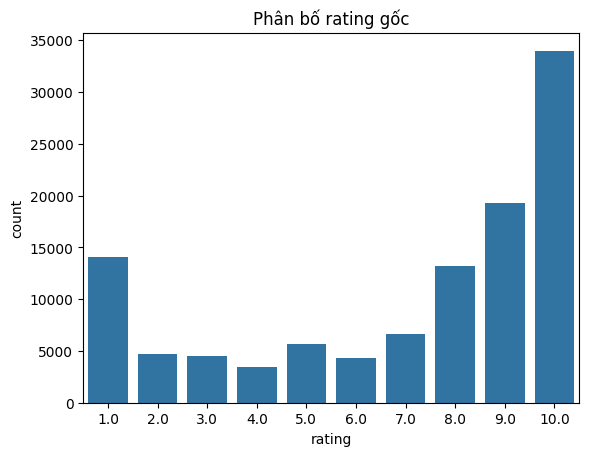

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='rating')
plt.title("Phân bố rating gốc")
plt.show()

In [13]:
def map_sentiment(rating):
    if rating >= 5:
        return 'positive'
    else:
        return 'negative'


df['sentiment'] = df['rating'].apply(map_sentiment)

<Axes: xlabel='sentiment', ylabel='count'>

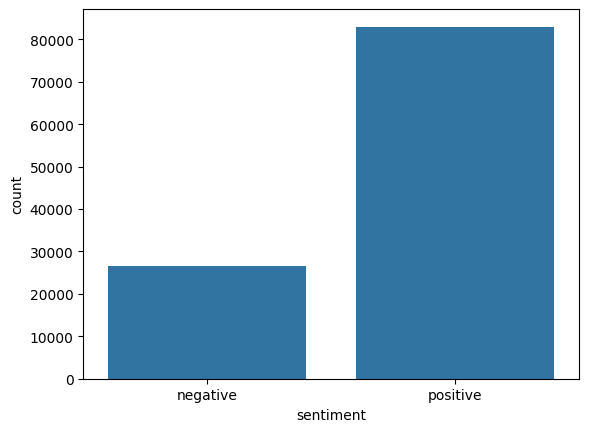

In [14]:
import seaborn as sns
sns.countplot(data=df, x='sentiment')


In [15]:
print(df['sentiment'].value_counts())

sentiment
positive    82994
negative    26688
Name: count, dtype: int64


In [16]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [17]:
from sklearn.preprocessing import StandardScaler

# Tạo dataframe chỉ gồm các feature muốn kiểm định
feature_cols = ['usefulCount', 'review_length', 'contains_non_ascii']
X_num = df[feature_cols].copy()

# Đảm bảo kiểu dữ liệu đúng
X_num['contains_non_ascii'] = X_num['contains_non_ascii'].astype(int)
y_bin = df['sentiment']


In [18]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X_num, y_bin)

for col, score, p in zip(X_num.columns, f_scores, p_values):
    print(f"{col}: F-score = {score:.2f}, p-value = {p:.4f}")

usefulCount: F-score = 4330.08, p-value = 0.0000
review_length: F-score = 180.78, p-value = 0.0000
contains_non_ascii: F-score = nan, p-value = nan


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


giữ cột usefull và reviewlength

In [19]:
from sklearn.preprocessing import StandardScaler

# Chỉ giữ lại 2 cột quan trọng
X_num = df[['usefulCount', 'review_length']]

# Chuẩn hóa đặc trưng số để tránh scale lệch
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1,3),
    stop_words='english',
    min_df=3,
    max_df=0.9,
    sublinear_tf=True
)

X_tfidf = vectorizer.fit_transform(df['text_cleaned'])

In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

In [22]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import numpy as np

# 2 đặc trưng định lượng quan trọng
X_num = df[['usefulCount', 'review_length']]
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Nếu X_svd là numpy (không phải sparse), chuyển đổi về dạng phù hợp
from scipy.sparse import csr_matrix
X_full = hstack([csr_matrix(X_svd), csr_matrix(X_num_scaled)])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_full, df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])


In [24]:
from imblearn.over_sampling import SMOTE

# SMOTE chỉ áp dụng cho tập huấn luyện
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra phân phối sau SMOTE
from collections import Counter
print("Phân phối nhãn sau khi SMOTE:")
print(Counter(y_train_resampled))

Phân phối nhãn sau khi SMOTE:
Counter({0: 66395, 1: 66395})


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      5338
           1       0.89      0.95      0.92     16599

    accuracy                           0.87     21937
   macro avg       0.84      0.78      0.80     21937
weighted avg       0.86      0.87      0.86     21937

=== Confusion Matrix ===
[[ 3316  2022]
 [  891 15708]]
AUC: 0.9197


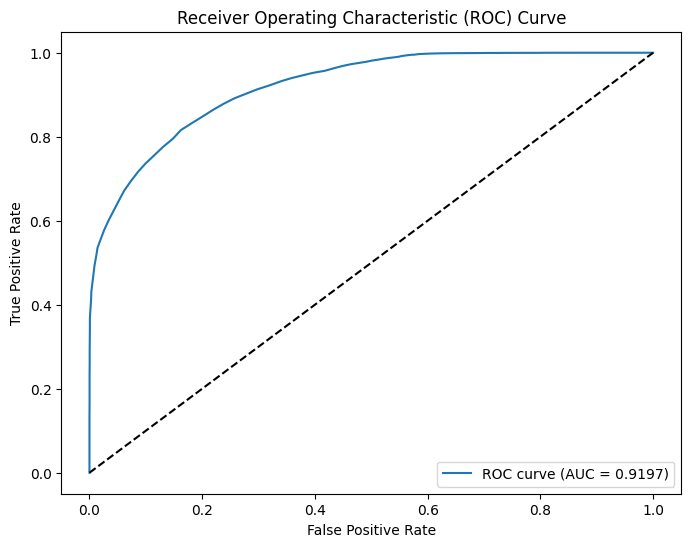

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Huấn luyện mô hình trên dữ liệu đã cân bằng
model_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
model_rf.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập test gốc (không resample)
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Dự đoán xác suất cho lớp positive (1)

# Đánh giá mô hình
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_rf))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_rf))

# Tính AUC
auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC: {auc:.4f}")

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

=== Logistic Regression - Classification Report ===
              precision    recall  f1-score   support

           0       0.53      0.78      0.63      5338
           1       0.92      0.78      0.84     16599

    accuracy                           0.78     21937
   macro avg       0.72      0.78      0.74     21937
weighted avg       0.82      0.78      0.79     21937

=== Logistic Regression - Confusion Matrix ===
[[ 4161  1177]
 [ 3653 12946]]
Logistic Regression AUC: 0.8602


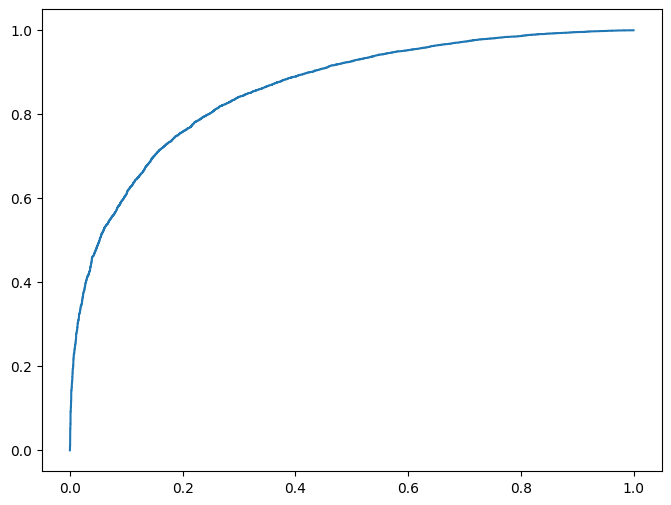

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Huấn luyện Logistic Regression
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập test
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

# Đánh giá mô hình Logistic Regression
print("=== Logistic Regression - Classification Report ===")
print(classification_report(y_test, y_pred_lr))

print("=== Logistic Regression - Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_lr))

# Tính AUC cho Logistic Regression
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression AUC: {auc_lr:.4f}")

# Vẽ ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')


In [ ]:
import xgboost as xgb

# Huấn luyện mô hình XGBoost
model_xgb = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
model_xgb.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập test
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Đánh giá mô hình XGBoost
print("=== XGBoost - Classification Report ===")
print(classification_report(y_test, y_pred_xgb))

print("=== XGBoost - Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_xgb))

# Tính AUC cho XGBoost
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"XGBoost AUC: {auc_xgb:.4f}")

# Vẽ ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')

# Thêm các ROC curves của mô hình vào một biểu đồ duy nhất
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Tuning hyperparameters with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model after GridSearchCV
best_model_rf = grid_search.best_estimator_

# Huấn luyện lại mô hình với tham số tốt nhất
best_model_rf.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập test gốc (không resample)
y_pred_rf = best_model_rf.predict(X_test)
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]  # Dự đoán xác suất cho lớp positive (1)

# Đánh giá mô hình
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_rf))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_rf))

# Tính AUC
auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC: {auc:.4f}")

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


threshold = 0.3
y_pred_adjusted = (y_pred_proba_rf >= threshold).astype(int)

# Đánh giá lại mô hình sau khi tinh chỉnh threshold
print("=== Adjusted Classification Report ===")
print(classification_report(y_test, y_pred_adjusted))

print("=== Adjusted Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_adjusted))